In [4]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import pingouin as pg
import numpy as np
from statsmodels.multivariate.manova import MANOVA
import os
import pathlib

sheet_url = 'https://docs.google.com/spreadsheets/d/1HErg80MdLUa5fg2S3Cs9DIgVTdGTjwulnD6KoJrjcjE/edit?usp=sharing'
sheet_name = 'All'

sheet_id = (
    sheet_url
    .replace('/d/', '*')
    .replace('/edit', '*')
    .split('*')
)

url = f'https://docs.google.com/spreadsheets/d/{sheet_id[1]}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

raw_data = pd.read_csv(url)

raw_data


,Tx,TH,11DIV,18DIV,21DIV
0,Iron-Sufficient,T3,0.8350,1.0490,1.1155
1,Iron-Sufficient,T3,0.9380,1.0680,1.0460
2,Iron-Sufficient,T3,0.9140,1.1465,1.1045
3,Iron-Sufficient,T3,1.1830,1.2185,1.0945
4,Iron-Sufficient,T3,1.0945,0.9745,0.9635
5,Iron-Sufficient,T3,1.0775,1.1505,0.8725
6,Iron-Deficient,T3,1.0135,1.1615,1.1415
7,Iron-Deficient,T3,1.0465,1.1915,1.1175
8,Iron-Deficient,T3,1.0945,1.0485,1.1295
9,Iron-Deficient,T3,1.2555,1.2385,1.0425


In [20]:
raw_data = raw_data.replace(
    {'Iron-Sufficient': 'FeS', 'Iron-Deficient': 'FeD'})
data = (raw_data
        .melt(id_vars=['Tx', 'TH'],
              var_name='DIV',
              value_name='Abs')
        )

data


,Tx,TH,DIV,Abs
0,FeS,T3,11DIV,0.8350
1,FeS,T3,11DIV,0.9380
2,FeS,T3,11DIV,0.9140
3,FeS,T3,11DIV,1.1830
4,FeS,T3,11DIV,1.0945
...,...,...,...,...
67,FeD,T4,21DIV,4.6795
68,FeD,T4,21DIV,6.5925
69,FeD,T4,21DIV,7.1720
70,FeD,T4,21DIV,9.9450


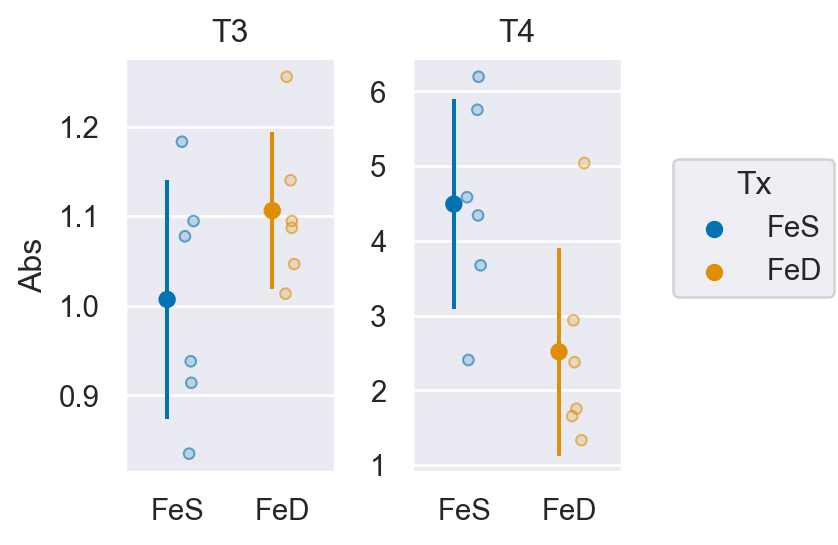

In [24]:
folder_name = 'TH_plots'
fname = 'TH-11DIV.svg'

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
save_loc = pathlib.Path(folder_name + '/' + fname)

(
    so.Plot(
        data=data.loc[data['DIV'] == '11DIV'],
        x='Tx',
        y='Abs',
        color='Tx',
    )
    .facet('TH')
    .share(x=False, y=False)

    .add(so.Dots(alpha=0.6), so.Jitter(0.2), so.Shift(x=0.1))
    .add(so.Dot(), so.Agg(), so.Shift(x=-0.1))
    .add(so.Range(), so.Est(errorbar='sd'), so.Shift(x=-0.1))
    .layout(size=(3.5, 3))
    .scale(color='colorblind')
    .label(
        x='',
    )
    .save(loc=save_loc, bbox_inches='tight')
)


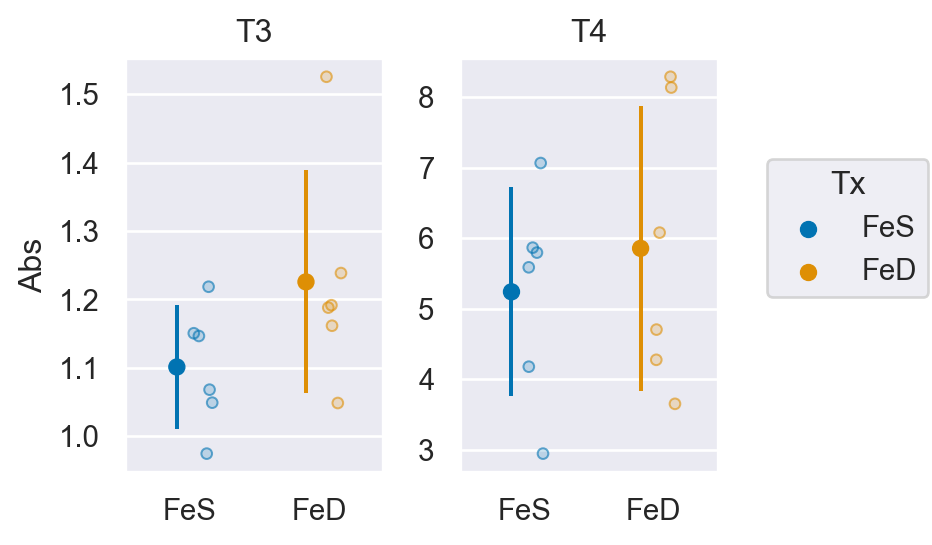

In [25]:
folder_name = 'TH_plots'
fname = 'TH-18DIV.svg'

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
save_loc = pathlib.Path(folder_name + '/' + fname)

(
    so.Plot(
        data=data.loc[data['DIV'] == '18DIV'],
        x='Tx',
        y='Abs',
        color='Tx',
    )
    .facet('TH')
    .share(x=False, y=False)

    .add(so.Dots(alpha=0.6), so.Jitter(0.2), so.Shift(x=0.1))
    .add(so.Dot(), so.Agg(), so.Shift(x=-0.1))
    .add(so.Range(), so.Est(errorbar='sd'), so.Shift(x=-0.1))
    .layout(size=(4, 3))
    .scale(color='colorblind')
    .label(
        x='',
    )
    .save(loc=save_loc, bbox_inches='tight')
)


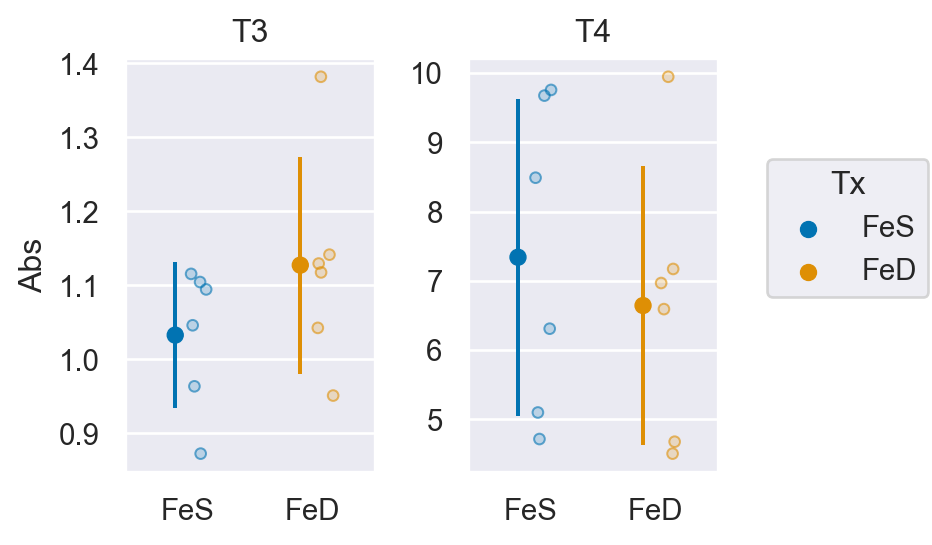

In [26]:
folder_name = 'TH_plots'
fname = 'TH-21DIV.svg'

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
save_loc = pathlib.Path(folder_name + '/' + fname)

(
    so.Plot(
        data=data.loc[data['DIV'] == '21DIV'],
        x='Tx',
        y='Abs',
        color='Tx',
    )
    .facet('TH')
    .share(x=False, y=False)

    .add(so.Dots(alpha=0.6), so.Jitter(0.2), so.Shift(x=0.1))
    .add(so.Dot(), so.Agg(), so.Shift(x=-0.1))
    .add(so.Range(), so.Est(errorbar='sd'), so.Shift(x=-0.1))
    .layout(size=(4, 3))
    .scale(color='colorblind')
    .label(
        x='',
    )
    .save(loc=save_loc, bbox_inches='tight')
)
